# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


# Load the dataset
df = pd.read_csv("C:\\Users\\LAB4-StudentPC43\\Downloads\\Data Science Salary 2021 to 2023.csv")

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [6]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

1. There are 93 unique job titles.
2. Average salary per working year:
work_year
2020     92302.63
2021     94087.21
2022    133379.51
2023    148954.56
Name: salary_in_usd, dtype: float64


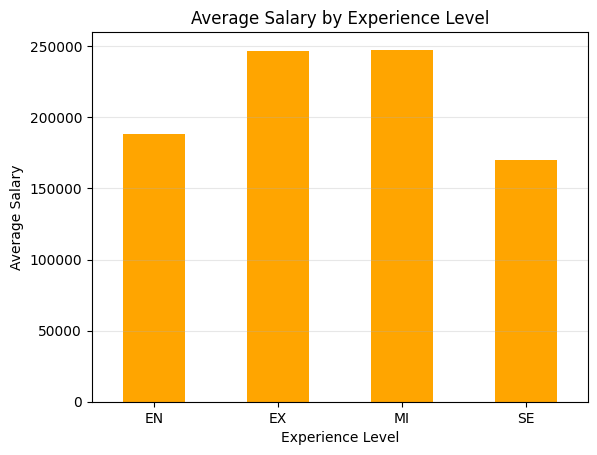

In [7]:
# 1. Your EDA code here
df['job_title'] = df['job_title'].astype('category')
uniqueJob = df['job_title'].nunique()
print(f'1. There are {uniqueJob} unique job titles.')

# 2. Average salary per working year
print('2. Average salary per working year:')
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().round(2)
print(avg_salary_per_year)

# 3. Average salary
avg_salary_by_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_by_exp.plot(
    kind='bar',
    x='experience_level',
    y='salary',
    color='orange',
    legend=False
)

plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary by Experience Level')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [8]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [9]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [10]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size,experience_level_encoded
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L,0
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L,0
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L,0
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L,0
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L,0
5,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L,0
6,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M,0
7,2023,EN,FT,Machine Learning Engineer,145885,USD,145885,US,M,0
8,2023,EN,FT,Research Scientist,220000,USD,220000,US,L,0
9,2023,EN,FT,Data Engineer,85000,USD,85000,US,M,0


In [12]:
# Future data for 2024
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict salaries for 2024
predicted_salary = model.predict(future_data)

# Create a DataFrame for display
predicted_2024 = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salary
})

predicted_2024


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. **Does your model make reasonable predictions? Why or why not?**

     My model’s predictions aren’t very accurate or reliable because it only uses work year and experience level, which are not enough to capture the real factors that affect salary. In reality, salaries depend on many things like job role, location, company size, and skills, so the model doesn’t have enough information to make reliable predictions.

   
3. **What are the limitations of using only `work_year` and `experience_level`?**

   I think the problem is that it’s too simple. By only using these two, the model misses other important things that affect pay, like location, job title, and even the skills a person has. That can make the predictions pretty off sometimes.


6. **How could you improve this model? (Think: more features, better encoding, etc.)**

   I’d add more features that matter, like job title, company size, location, and maybe education.

   
8. **Why is **R² not enough** to trust your predictions?**

   R² just shows how much of the salary differences the model explains, but it doesn’t tell us if the predictions themselves are actually close to real salaries.

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀